In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.utils import to_categorical

In [2]:
!pip install deeplake

In [3]:
import deeplake
ds = deeplake.load('hub://activeloop/fer2013-train')

\

Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fer2013-train



/

hub://activeloop/fer2013-train loaded successfully.



In [4]:
print(ds)

Dataset(path='hub://activeloop/fer2013-train', read_only=True, tensors=['images', 'labels'])


In [7]:
# Define a function to preprocess the images and labels
def preprocess_data(ds):
    images = []
    labels = []
    for sample in ds:
        images.append(sample['images'].numpy())
        labels.append(sample['labels'].numpy())
    images = np.array(images)
    labels = np.array(labels)
    labels = to_categorical(labels, num_classes=7)
    return images, labels

images, labels = preprocess_data(ds)

# Normalize the images
images = images / 255.0

from sklearn.model_selection import train_test_split

# Splitting the data into 80% training and 20% remaining (validation + test)
train_images, remaining_images, train_labels, remaining_labels = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Splitting the remaining data into 10% validation and 10% test
val_images, test_images, val_labels, test_labels = train_test_split(remaining_images, remaining_labels, test_size=0.5, random_state=42, stratify=remaining_labels)

In [8]:
model = models.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))  # Input layer
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [10]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model

model.fit(train_images, train_labels, batch_size=64, epochs=25, validation_data=(val_images, val_labels))

Epoch 1/25
359/359 [==============================] - 96s 264ms/step - loss: 1.5971 - accuracy: 0.3751 - val_loss: 1.4928 - val_accuracy: 0.4302
Epoch 2/25
359/359 [==============================] - 88s 245ms/step - loss: 1.4566 - accuracy: 0.4352 - val_loss: 1.3844 - val_accuracy: 0.4775
Epoch 3/25
359/359 [==============================] - 88s 246ms/step - loss: 1.3713 - accuracy: 0.4751 - val_loss: 1.3145 - val_accuracy: 0.5099
Epoch 4/25
359/359 [==============================] - 90s 249ms/step - loss: 1.3115 - accuracy: 0.5015 - val_loss: 1.2728 - val_accuracy: 0.5200
Epoch 5/25
359/359 [==============================] - 87s 242ms/step - loss: 1.2714 - accuracy: 0.5167 - val_loss: 1.2333 - val_accuracy: 0.5367
Epoch 6/25
359/359 [==============================] - 92s 258ms/step - loss: 1.2251 - accuracy: 0.5320 - val_loss: 1.2199 - val_accuracy: 0.5305
Epoch 7/25
359/359 [==============================] - 88s 245ms/step - loss: 1.2023 - accuracy: 0.5418 - val_loss: 1.1822 - val_ac

In [12]:
score = model.evaluate(test_images, test_labels, verbose=0)  # Use 'test_images' and 'test_labels'
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 1.1540886163711548
Test accuracy: 0.5921281576156616


1/1 [==============================] - 0s 337ms/step


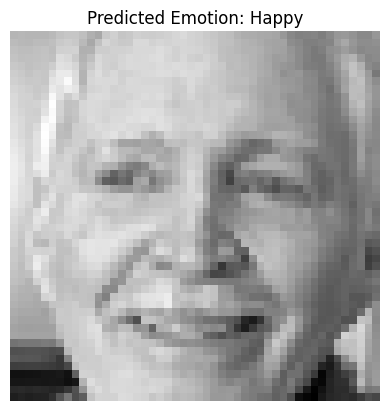

In [14]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

random_index = random.randint(0, test_images.shape[0] - 1)
random_image = test_images[random_index]
random_label = test_labels[random_index]

# Predict the emotion of the random image
prediction = model.predict(np.expand_dims(random_image, axis=0))
predicted_emotion = emotion_labels[np.argmax(prediction)]

plt.imshow(random_image.squeeze(), cmap='gray')
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.axis('off')
plt.show()